# Coursework Applied Advanced Optimisation

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.1 - 29/01/2025

---
---

This coursework covers some of the so-called "geometric problems". These problems belong to an additional family of applications which complements Chapter $1$ (Approximation and Fitting) and Chapter $2$ (Statistical Estimation). Geometric problems cover many important applications, the most famous of which is machine learning. In fact, the popular Support Vector Machines are a family of classification methods which are nothing else than convex optimisation problems.

# Important instructions

You must read this section in its entirety before starting the coursework.

This coursework is intended to be an occasion for you to explore an optimisation topic in autonomy. The coursework is based on "Section $8.6$ Classification" of the reference book $[1]$ (link available on Blackboard). You are supposed to read that section to be able to complete the coursework.

You cannot use the sklearn library, nor any other library in which SVM or other classifiers are already implemented. The objective of the coursework is that you learn how these classifiers are obtained from scratch. This means that you will have to use your knowledge of Convex Optimisation and CVX to solve the questions directly.

You must copy this notebook to your drive; work on the file and submit the completed .ipynb file to Blackboard. Before submitting, make sure that you run all the code cells and save the notebook. This will ensure that the notebook looks exactly how you intend it to look. Obviously it is expected that your submission will have plenty of text cells in which you explain your work.

The coursework consists of 8 questions. Create a new section for each question.

Generally speaking, no help will be provided on the coursework besides clarifications on the wording of the text. You need to figure out by yourself how to solve the coursework. Note that after reading Section $8.6$ of the book, you will have all the required information to be able to solve the coursework.

The coursework is an individual piece of assessment. You can discuss it with other students, but you cannot develop solutions together and you cannot share code, text or figures. You cannot ask other people (including online forums) to solve any part of the coursework on your behalf. Standard plagiarisms policy will be applied.

The use of generative AI tools is not allowed.

# The problem and data

In pattern recognition and classification problems we are given two sets of points in $\mathbb{R}^n$, $\{x_1,\dots,x_N\}$ and $\{y_1,\dots,y_M\}$, and wish to find a function $f : \mathbb{R}^n \to \mathbb{R}$ (within a given family of functions) that is positive on the first set and negative on
the second, i.e.,

$$
f(x_i) > 0,\quad i = 1,\dots,N, \qquad f(y_i) < 0,\quad i = 1, \dots ,M.
$$

If these inequalities hold, we say that $f$ separates, classifies, or discriminates the two sets of points. This is an instance of supervised learning.

In the next subsections you will find $4$ datasets which will be used in the questions below. For datasets $1$, $2$ and $3$ you are given a "train set" and a "test set". You are supposed to develop your optimisation algorithm only on the train set. Do not use the test set for training/optimisation. The purpose of the test set is for you to test a posteriori how the classifier that you have obtained performs. For data set $4$, use the entire set in the optimisation (i.e. there is no test phase).

### Dataset 1

In [1]:
# Dataset 1. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_1 = np.array([[ 1.75038375,  1.36985822,  0.73076475,  0.73666559,  0.34224149,
         1.09826685,  0.86211442,  1.24674778,  0.12887349,  0.35909321,
         0.35246291,  0.63681688,  0.54697422,  0.76350366,  1.5921626 ,
         0.51972449,  1.09117696,  1.42626192,  1.06227916,  0.21480643,
         1.42300815,  0.84256355,  1.7533684 ,  0.69974175,  0.76946708,
        -0.18379672,  1.0485532 ,  0.96472069,  1.31625354,  0.36578051,
         0.77772201,  1.64143191],
       [-0.16275141, -0.82300504, -1.30848519, -0.99270645, -1.81370696,
         2.8696898 , -1.06625993, -0.73442029,  0.50866809, -0.99408544,
         0.40021373, -0.10562573,  0.30068813, -0.18723889,  1.5299066 ,
         0.23149303,  0.21033337, -0.37766466,  1.7832445 ,  0.77048214,
         2.38601163, -0.12591569,  0.58083659, -0.21862494,  1.21901444,
        -0.70226941,  1.82745304,  1.02706123, -1.21456594, -0.04151123,
         0.57038679,  0.37708978]]).T

Y_train_1 = np.array([[-1.61978158, -1.42158013, -1.10032926, -0.84133058, -1.61746142,
        -1.37001245, -0.81530917, -2.19997218, -1.17612194,  0.28991103,
        -1.15223907, -0.20748713, -0.26374853, -1.38338996, -0.60422153,
        -0.6807668 , -0.49697651, -1.76927614, -1.07011443, -2.13637377,
        -0.97815482, -1.38615705,  0.16678405, -0.20236665, -0.52664181,
        -0.52065308, -1.06395708, -0.09375681],
       [ 1.29534095,  0.70877882,  0.22482794, -1.4081337 , -0.63963762,
         0.70944757, -0.21818498, -0.87909018,  0.23087154,  1.26274235,
         0.23315878, -1.08721924,  0.46586729, -0.64121136, -0.844737  ,
        -0.18690388, -0.71034608, -0.98534397,  0.18144543, -0.8120575 ,
         0.00244075, -0.28833748,  1.3720753 ,  0.34245524,  1.1515264 ,
         1.11200279,  0.38977343,  0.3943303 ]]).T

X_test_1 = np.array([[ 1.21290648,  0.60647149,  1.21197796,  1.54724686,  1.00972903,
         0.56216029,  0.72973515,  0.39284694,  0.17336897,  0.74244925,
         0.6168276 ,  0.91094238,  0.75389832,  1.22221484,  0.60651985,
         0.54111179,  0.91559423,  0.25201646],
       [-0.71869421, -1.12772433, -0.58861397, -0.0145585 , -1.45496704,
        -1.37186247,  0.35988092,  1.00862714,  0.30279016,  2.55054793,
         2.28438069, -0.35502465, -0.9418674 ,  0.89477983, -1.14724826,
        -0.7799858 ,  1.06303296, -0.55712765]]).T

Y_test_1 = np.array([[-1.19236589, -1.10995069,  0.37669071, -0.95531888, -0.89232474,
        -0.02095101, -0.29050649, -0.37881187, -0.99739798, -1.20639358,
        -0.54710686, -0.25815146, -1.136852  , -0.99897624, -0.78183458,
         0.21608231, -1.39421902, -0.85569085, -0.25452413, -2.08591412,
        -0.7539892 , -0.49801935],
       [-1.09011136,  1.87167148, -1.63772617, -0.20106049, -1.30309817,
         1.05833253, -0.04721317, -1.6502976 , -0.36833975, -1.2191319 ,
        -0.75123888,  0.43614121, -0.09030079, -1.32835851, -0.10259796,
        -0.04046664,  0.06085472,  0.119087  ,  0.81613417, -0.55277698,
        -1.03559666,  0.55011099]]).T

### Dataset 2

In [2]:
# Dataset 2. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_2 = np.array([[-1.614901  ,  0.28714288, -1.58856523, -0.62398345, -1.24054186,
         1.3540726 , -1.8376991 , -0.76542848,  1.01551298,  1.56603302,
        -1.03332383, -0.65191468,  0.08107311,  1.1886501 ,  1.55395519,
         1.85121256, -0.38917117,  1.60296587, -1.29848704,  0.8441058 ,
         1.51105349,  1.30539824, -1.78357771, -0.07797286, -1.94890625,
        -0.67010608,  1.26205438, -0.64744794,  1.49213191, -1.32792377,
         0.40606432,  1.1654875 , -1.39691976, -1.53382165],
       [-0.74107291,  2.0226272 , -0.80311089, -1.93652965,  0.93944489,
        -0.76972033,  0.4438167 , -1.28950516, -0.54197248, -0.68859753,
         0.84952455, -1.46468159,  0.89980228, -0.73998096, -1.24199011,
        -0.004975  ,  1.22250794,  0.6042052 , -0.09834692,  1.90774378,
         1.21666545, -1.52465769,  1.46776645, -1.48563138,  0.92646412,
        -2.35182561,  1.08872015,  1.50066709,  1.54360638,  0.08300261,
         1.46244545,  0.42036718, -1.16291727,  1.21058973]]).T

Y_train_2 = np.array([[ 0.33752225,  0.26007797, -0.77360943, -0.80707957, -1.02059109,
         1.21402308, -1.05628487, -0.44228055, -0.40975282, -0.58552875,
         0.73242037,  0.60985187, -0.38448676, -1.10713613,  0.71019777,
         0.42445554,  0.54032669,  0.16261397, -0.7642942 , -0.0826362 ,
        -0.01755153, -1.33428073, -0.05495925,  0.971422  , -0.11024436,
         0.46940181],
       [ 0.1972156 , -0.40692781, -0.21251355, -0.38086556,  0.55460174,
        -0.00750315, -0.08248651,  0.79141975, -0.76573106,  0.28460164,
         0.75396732,  0.23217386,  0.97141896, -0.63721127,  0.41754396,
        -1.47865265, -0.11135927, -0.18183213, -0.03324034,  0.56319091,
        -0.84912994,  0.28134522,  0.52742495, -0.26947631,  0.44022805,
         0.77060324]]).T

X_test_2 = np.array([[-1.18919052,  1.86146486,  0.73290109, -1.02598963, -1.94986405,
         1.98413584, -0.22543794,  1.6738425 , -0.54083103,  0.23855336,
         0.29067775,  0.90452835, -0.7807143 ,  0.92563898,  0.5891893 ,
        -1.8506076 ],
       [ 1.01734226,  1.22983793, -1.32784027, -1.25200345, -1.11164531,
         0.11500191,  1.37788957, -0.04001507, -1.45583732,  1.64623486,
        -1.5711447 , -1.27852394,  1.32218203,  1.77824856, -1.83015366,
        -1.32219896]]).T

Y_test_2 = np.array([[ 0.44030401, -0.96934769,  0.83688707,  0.42107823, -0.64710246,
        -0.80688878, -0.17615909, -0.07870086,  0.37287753,  1.24256423,
        -0.07644516,  0.91728516,  1.4185267 , -0.57032662,  0.32910968,
        -0.62365553,  0.04200134, -0.05018494, -0.25026012,  0.30984256,
         0.13336253,  0.92133881, -0.76288057,  0.45065785],
       [ 0.9436088 , -0.72879255, -0.54252464, -0.95075636, -0.13248588,
        -0.59037888,  1.37253857,  0.75478021, -0.65673396, -0.31060961,
         0.37673711,  0.94192255, -0.24612582,  0.90276183, -0.88489523,
         0.05975249, -1.13783772, -0.72226809,  0.80242032,  0.47174672,
        -0.8985866 ,  0.59402413, -0.07023891, -0.97869024]]).T

### Dataset 3

In [3]:
# Dataset 3. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_3 = np.array([[ 0.30920485,  0.74779523, -1.19805934, -1.4065875 ,  0.81773837,
        -1.30667592, -0.22120141,  0.07813527, -0.42443599,  0.03138162,
        -2.02716273, -0.20216417, -1.77093289,  0.19895122,  0.27524467,
        -0.9843448 , -0.31251963, -1.72018154, -2.05161935, -0.81445041,
         0.75566503, -1.61181827,  0.24942261,  0.43094924,  0.26285439,
        -1.49128776, -1.2378428 ,  0.15350841, -1.63601617, -0.03734756,
        -0.22413227],
       [-0.127041  ,  0.54957438,  1.40047603, -1.03687185,  1.64300265,
        -0.60711187,  1.00868763,  0.18433247,  1.30854456,  1.27867747,
        -0.07552655,  0.09829492, -0.15602456,  2.27694191,  0.58976897,
         1.29546509,  1.85361272, -0.11323539,  0.3295589 ,  0.03881959,
         0.62671139, -1.16122353,  0.37041953, -0.51610516,  0.08970487,
         0.68265883,  0.7264372 ,  0.8912278 ,  1.14409337,  0.53962298,
         0.94477311]]).T

Y_train_3 = np.array([[-0.48691402,  0.50954902,  1.35242892,  1.89600064, -0.33075371,
        -0.62663858, -0.85151619, -0.59739923,  0.15581821,  0.24130156,
         0.0081454 ,  1.01975478,  1.22467352,  0.51038341,  0.88796385,
         0.15940018, -0.1636123 ,  1.53916295, -0.6851801 , -0.42081847,
        -0.36004546,  1.10877664,  1.82124821, -0.04156698,  0.23092986,
         1.85584796, -0.34194837,  0.89063568, -0.99471418],
       [ 0.57259859, -1.66427178,  0.60859541, -0.42653506, -0.55325533,
        -0.45097084, -0.06022663,  0.27829883, -1.14573741, -1.74371889,
        -0.58656254, -0.39964896, -1.45537741, -1.09925804, -1.22007405,
        -1.05506347, -1.53782127, -0.40646646,  0.56462893, -1.03126372,
         0.03132026, -0.56596703, -0.46607732, -0.71850484, -1.16563865,
         0.39711336, -0.50298565, -0.73843955, -0.7858591 ]]).T

X_test_3 = np.array([[-1.55182484, -1.14359579, -0.28724359,  0.4860189 ,  0.59348201,
         0.20764271, -0.71978547, -0.52880272, -0.83190068, -0.17344159,
         0.11892081, -1.55268459, -0.97786341,  1.15004209, -1.55962329,
        -0.98048598, -0.73153577, -0.75993791, -0.22465612],
       [ 0.46910804,  0.76280671,  1.0525906 ,  1.96041925,  0.25278868,
         0.88856402,  1.72334673,  1.28542054,  0.93244079,  1.50362044,
         0.14210094, -0.3087488 ,  1.51041733, -0.46423271, -0.26480295,
         0.8478617 ,  1.24236135,  1.31112526,  1.70271788]]).T

Y_test_3 = np.array([[ 0.59260113, -0.87894137, -0.02974639,  1.7173351 , -0.09130345,
         1.31650323,  0.3712312 ,  1.39730283,  1.12756772,  0.62682189,
        -0.34408365,  1.33380816,  1.89457786, -0.31784745,  1.37086214,
         1.69531142, -0.53631325,  1.60097254,  0.98840214,  1.81872078,
         0.67050908],
       [-1.44842808,  0.65349306, -0.63475756, -0.17875463, -0.93824346,
        -1.10788814, -1.30192489,  0.39040035, -1.65289561, -2.14337167,
        -0.11501714, -0.73018114, -1.57392425, -1.493817  ,  0.22375044,
        -0.91174565, -0.20549059, -0.09531556, -1.75933045,  0.7346544 ,
        -1.01221609]]).T

### Dataset 4

In [4]:
# Dataset 4. DO NOT CHANGE THE NUMBERS
import numpy as np
X_4 = np.array([[ 3.496052,  4.042794,  2.79643 ,  5.085416,  4.240754,  3.737034,
         3.343466,  3.786328,  4.965464,  3.826312,  4.208512,  4.620014,
         3.242036,  5.14892 ,  2.50782 ,  3.528098,  4.719288,  5.184396,
         5.086984,  3.900596],
       [-2.938138,  0.507444,  2.100728, -0.066346,  0.308112,  1.280272,
         3.851106,  0.200998,  0.104566, -1.468236, -2.356998,  2.863952,
         1.513512, -2.811326,  1.007538,  1.21716 ,  1.255772,  1.17943 ,
        -2.121112, -0.276458]]).T

Y_4 = np.array([[-4.47517 , -3.616592, -3.222338, -1.616118, -5.363638, -3.54466 ,
        -1.163848, -1.032822, -1.36367 , -1.990576, -1.959902, -0.24304 ,
        -1.288602, -0.81389 , -1.89679 , -1.068004, -2.55192 , -4.272996,
        -1.77429 ,  0.303408],
       [ 2.363466,  4.178916,  2.78908 ,  0.5145  ,  1.867194,  2.923438,
         4.613742,  0.950796,  0.377692,  1.884344,  1.461572, -0.978432,
         3.36434 ,  2.866108,  3.021634,  1.55918 ,  1.496068,  1.593088,
         2.453626,  1.409632]]).T

Z_4 = np.array([[ 1.710198,  2.58181 ,  0.581826, -2.765266,  2.969792,  1.069866,
        -1.743714,  1.217356,  2.143554, -2.254784, -3.259284,  2.706466,
         0.898268,  0.058898, -2.59896 , -3.25409 ,  4.040442, -3.34033 ,
        -3.096212, -0.716478],
       [-3.13698 , -4.892258, -3.686858, -4.64716 , -4.04887 , -3.83376 ,
        -4.468408, -4.850902, -3.36238 , -4.180288, -6.078254, -4.428228,
        -3.690582, -4.903822, -4.286912, -4.954782, -3.865414, -3.960376,
        -5.242314, -2.98557 ]]).T

In [8]:
X_train_1.shape

(32, 2)

In [9]:
Y_train_1.shape

(28, 2)

# Questions

0.   Read Section $8.6$ of $[1]$.
1.   For dataset $1$, determine a standard support vector classifier with $\gamma = 0.1$ (notation from Section $8.6$ of the book). Plot the points, the classifier $f$ and the associated slab. **[10 marks]**

2.   Use the test set to assess how good the classifier is on unseen data. To this end, first define a "metric" (or more than one if you prefer) which numerically quantifies how good or bad a classifier is. Explain why you picked this metric and how the metric works. **[10 marks]**

3.   Discuss, possibly with the help of figures, the role of the parameter $\gamma$ and find for which $\gamma$ (or $\gamma$'s) your classifier behaves best on the test set. **[10 marks]**

4.   Now determine a linear classifier by approximating it via logistic modeling. Compare and discuss the results with those obtained in parts 1. 2. and 3. **[10 marks]**

5.   For dataset $2$, determine a standard support vector classifier with $\gamma=0.1$. Plot the points, the classifier $f$ and the associated slab. Score your classifier on the test set using your metric. **[5 marks]**

6.   Implement nonlinear classifiers for dataset $2$. There are many options here. Discuss as much as you can and try to find the best classifier among those which are obtainable by means of convex optimisation. The more details you provide to explain how you reached your final choice, the better. **[25 marks]**

7.   Repeat parts 5. and 6. on dataset 3. **[15 marks]**

8.   Dataset $4$ consists of three sets of points corresponding to three classes instead of two. Explain how you would go about finding a classifier for this case. Try to find a classifier and plot the points and the classifiers. Describe your results. **[15 marks]**

## Quetion 1
For dataset $1$, determine a standard support vector classifier with $\gamma = 0.1$ (notation from Section $8.6$ of the book). Plot the points, the classifier $f$ and the associated slab. **[10 marks]**


Vector a: [ 1.32003818 -0.17034156]
Offset b: -0.03907326256830654


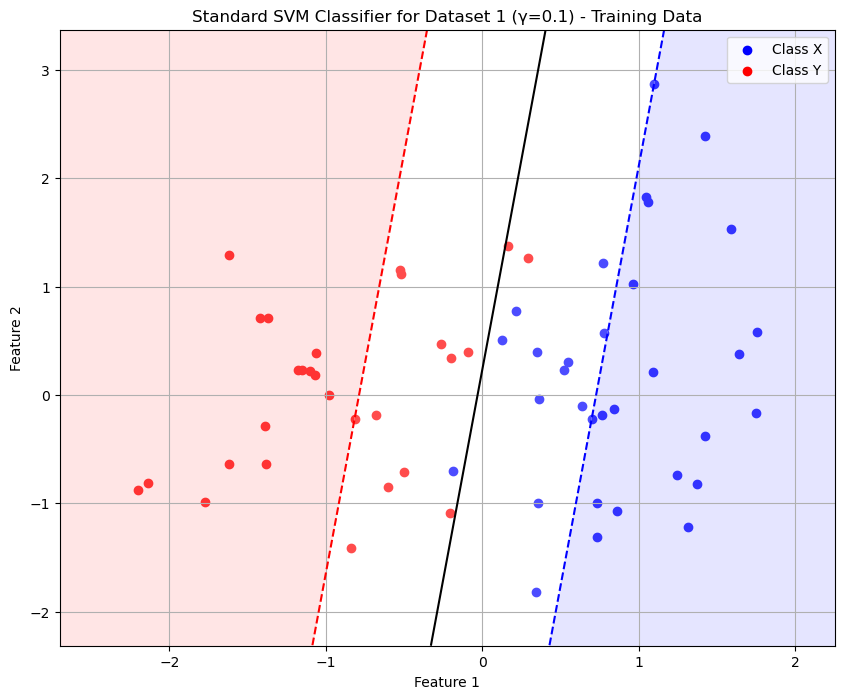

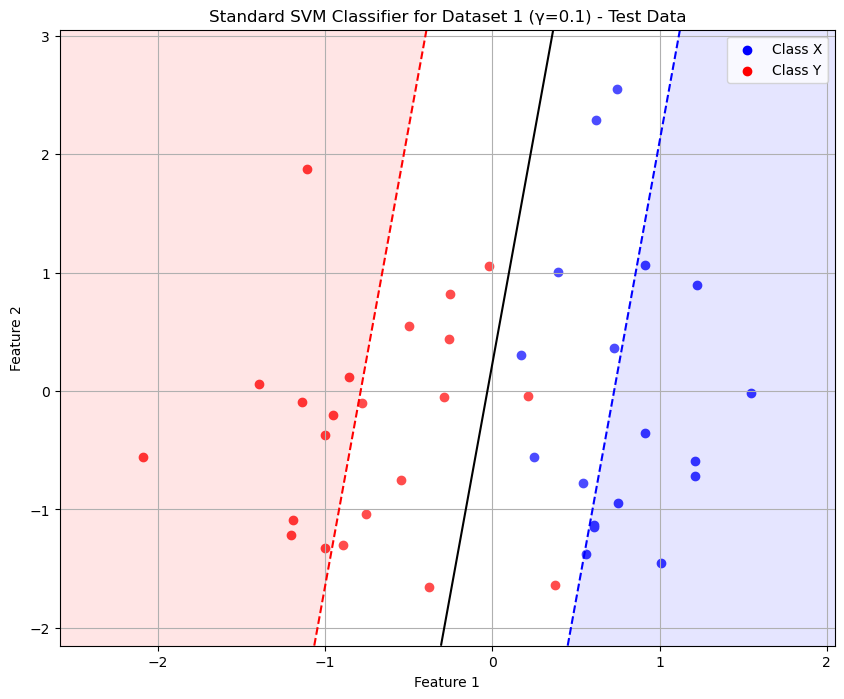

In [23]:
##Question 1
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Define the standard support vector classifier function
def standard_svm(X, Y, gamma=0.1):

    n, d = X.shape  # n samples, d features for X
    m, _ = Y.shape  # m samples for Y
    
    # Define the optimization variables
    a = cp.Variable(d)  # normal vector to the separating hyperplane
    b = cp.Variable()   # offset
    xi = cp.Variable(n)  # slack variables for X
    eta = cp.Variable(m)  # slack variables for Y
    
    # Define the objective function
    objective = cp.Minimize(cp.norm(a, 2) + gamma * (cp.sum(xi) + cp.sum(eta)))
    
    # Define the constraints
    constraints = [
    X @ a - b >= 1 - xi,  # X should be on the positive side
    Y @ a - b <= -1 + eta,  # Y should be on the negative side
    xi >= 0,  # slack variables are non-negative
    eta >= 0  # slack variables are non-negative
]
    
    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    return a.value, b.value

# Apply the standard SVM to dataset 1
a_1, b_1 = standard_svm(X_train_1, Y_train_1, gamma=0.1)
print("Vector a:", a_1)
print("Offset b:", b_1)

# Function to plot the data points and the classifier
def plot_classifier(X, Y, a, b, title="Support Vector Classifier"):
    plt.figure(figsize=(10, 8))
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Class Y')
    
    # Plot the decision boundary (hyperplane)
    x_min, x_max = min(np.min(X[:, 0]), np.min(Y[:, 0])) - 0.5, max(np.max(X[:, 0]), np.max(Y[:, 0])) + 0.5
    y_min, y_max = min(np.min(X[:, 1]), np.min(Y[:, 1])) - 0.5, max(np.max(X[:, 1]), np.max(Y[:, 1])) + 0.5
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the decision function values
    Z = grid @ a - b
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['r', 'k', 'b'], linestyles=['--', '-', '--'])
    
    # Fill the regions
    plt.contourf(xx, yy, Z, levels=[-100, -1, 1, 100], colors=['#FFAAAA', '#FFFFFF', '#AAAAFF'], alpha=0.3)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the classifier for dataset 1 (training data)
plot_classifier(X_train_1, Y_train_1, a_1, b_1, title="Standard SVM Classifier for Dataset 1 (γ=0.1) - Training Data")

# Plot the classifier for dataset 1 (test data)
plot_classifier(X_test_1, Y_test_1, a_1, b_1, title="Standard SVM Classifier for Dataset 1 (γ=0.1) - Test Data")

## Question 2
Use the test set to assess how good the classifier is on unseen data. To this end, first define a "metric" (or more than one if you prefer) which numerically quantifies how good or bad a classifier is. Explain why you picked this metric and how the metric works. **[10 marks]

### Metric Selection Summary
To comprehensively evaluate the classifier's performance, the following metrics were chosen:
1. **Accuracy**: Overall classification correctness, suitable for balanced datasets.
2. **Precision**: Focuses on the proportion of true positives among predicted positives, important when the cost of false positives is high.
3. **Recall**: Measures the proportion of actual positives correctly identified, critical when the cost of false negatives is high.
4. **Specificity**: Measures the proportion of actual negatives correctly identified, complementing Recall.
5. **F1 Score**: Harmonic mean of Precision and Recall, balancing the two.
6. **Balanced Accuracy**: Average of Recall and Specificity, useful for imbalanced datasets.
7. **Misclassification Rate**: Proportion of incorrect predictions, directly reflecting the error rate.
8. **Geometric Mean**: Geometric mean of Recall and Specificity, penalizing poor performance in either class.

These metrics provide a holistic evaluation of the classifier's performance on both positive and negative classes, especially important for imbalanced datasets or when different error types have varying costs.


In [ ]:
# 2. Evaluating the Classifier on Test Data

# Define a more comprehensive evaluation function
def evaluate_classifier(X_test, Y_test, a, b):
    # Combine test data
    X_predictions = X_test @ a - b
    Y_predictions = Y_test @ a - b
    
    # Count correct predictions
    X_correct = np.sum(X_predictions > 0)
    Y_correct = np.sum(Y_predictions < 0)
    
    # Calculate metrics
    total_samples = len(X_test) + len(Y_test)
    
    # True positives: X points correctly classified as X
    TP = X_correct
    # False positives: Y points incorrectly classified as X
    FP = len(Y_test) - Y_correct
    # True negatives: Y points correctly classified as Y
    TN = Y_correct
    # False negatives: X points incorrectly classified as Y
    FN = len(X_test) - X_correct
    
    # Accuracy: Overall proportion of correct predictions
    accuracy = (TP + TN) / total_samples
    
    # Precision: Proportion of true positives among all positive predictions
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall (Sensitivity): Proportion of true positives among all actual positives
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Specificity: Proportion of true negatives among all actual negatives
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Balanced Accuracy: Average of recall and specificity
    balanced_accuracy = (recall + specificity) / 2
    
    # Misclassification Rate: Proportion of incorrect predictions
    misclassification_rate = 1 - accuracy
    
    # Geometric Mean: Square root of the product of recall and specificity
    g_mean = np.sqrt(recall * specificity)
    
    # Store all metrics in a dictionary
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1_score,
        'balanced_accuracy': balanced_accuracy,
        'misclassification_rate': misclassification_rate,
        'g_mean': g_mean,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN
    }
    
    return metrics

# Evaluate the classifier on the test set
metrics_1 = evaluate_classifier(X_test_1, Y_test_1, a_1, b_1)

# Print the metrics
print("Performance Metrics for Standard SVM Classifier (γ=0.1) on Test Set:")
print(f"Accuracy: {metrics_1['accuracy']:.4f}")
print(f"Precision: {metrics_1['precision']:.4f}")
print(f"Recall: {metrics_1['recall']:.4f}")
print(f"Specificity: {metrics_1['specificity']:.4f}")
print(f"F1 Score: {metrics_1['f1_score']:.4f}")
print(f"Balanced Accuracy: {metrics_1['balanced_accuracy']:.4f}")
print(f"Misclassification Rate: {metrics_1['misclassification_rate']:.4f}")
print(f"Geometric Mean: {metrics_1['g_mean']:.4f}")
print(f"Confusion Matrix:")
print(f"TP: {metrics_1['TP']}, FP: {metrics_1['FP']}")
print(f"FN: {metrics_1['FN']}, TN: {metrics_1['TN']}")


### Results Summary
The performance of the **Standard SVM Classifier ($\gamma = 0.1$)** on the test set is as follows:
- **Accuracy**: 0.9500
- **Precision**: 0.9000
- **Recall**: 1.0000
- **Specificity**: 0.9091
- **F1 Score**: 0.9474
- **Balanced Accuracy**: 0.9545
- **Misclassification Rate**: 0.0500
- **Geometric Mean**: 0.9535

**Confusion Matrix**:
|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | TP = 18            | FN = 0             |
| **Actual Negative** | FP = 2             | TN = 20            |

**Conclusion**:
- The classifier performs exceptionally well on the positive class (Recall = 1.0000) with no false negatives.
- It performs well on the negative class (Specificity = 0.9091) but has a few false positives.
- Overall metrics (F1 Score, Balanced Accuracy, Geometric Mean) are close to 0.95, indicating balanced and excellent performance across both classes.

## Question 3
Discuss, possibly with the help of figures, the role of the parameter $\gamma$ and find for which $\gamma$ (or $\gamma$'s) your classifier behaves best on the test set. **[10 marks]**

#### **Role of the Parameter $\gamma$**
The parameter $\gamma$ in the Support Vector Machine (SVM) classifier plays a critical role in controlling the trade-off between the **margin width** and the **classification error**:
1. **Small $\gamma$ values** :
   - The classifier focuses on **maximizing the margin** between classes.
   - The decision boundary tends to be **smoother** and less influenced by individual data points.
   - This can lead to **underfitting**, as the model may become too simple to capture the underlying patterns in the data.

2. **Large $\gamma$ values** :
   - The classifier focuses on **correctly classifying all training points**, even if it results in a smaller margin.
   - The decision boundary becomes **more complex** and highly influenced by individual data points.
   - This can lead to **overfitting**, as the model may capture noise in the training data.


#### **Finding the Best $\gamma$**
To determine the optimal $\gamma$ value, we evaluated the classifier's performance on the test set using multiple metrics:
- **Accuracy**: Measures overall classification correctness.
- **Precision**: Focuses on the proportion of true positives among predicted positives.
- **Recall**: Measures the proportion of actual positives correctly identified.
- **Specificity**: Measures the proportion of actual negatives correctly identified.
- **F1 Score**: Balances precision and recall.
- **Balanced Accuracy**: Averages recall and specificity, useful for imbalanced datasets.
- **G-Mean**: Geometric mean of recall and specificity, penalizing poor performance in either class.

We tested $\gamma$ values in the range `[0.001, 0.01, 0.1, 1, 10, 100]` and plotted the metrics against $\gamma$ on a log scale. The results showed:
- **Small $\gamma$ values** (e.g., 0.001, 0.01) resulted in lower performance metrics, indicating underfitting.
- **Intermediate $\gamma$ values** (e.g., 0.1) provided the best balance between precision, recall, and specificity.
- **Large $\gamma$ values** (e.g., 10, 100) led to overfitting, with metrics degrading due to the model's over-reliance on training data noise.

In [ ]:
# 3. The Role of Parameter γ

# Test different values of gamma
def test_gamma_values(X_train, Y_train, X_test, Y_test, gamma_values):

    results = []
    
    for gamma in gamma_values:
        # Train the classifier with the current gamma
        a, b = standard_svm(X_train, Y_train, gamma=gamma)
        
        # Evaluate on test data
        metrics = evaluate_classifier(X_test, Y_test, a, b)
        
        # Store the results
        results.append((gamma, a, b, metrics))
        
        # Plot the classifier for each gamma
        plt.figure(figsize=(10, 8))
        plot_classifier(X_train, Y_train, a, b, title=f"SVM Classifier with γ={gamma} - Training Data")
        
        plt.figure(figsize=(10, 8))
        plot_classifier(X_test, Y_test, a, b, title=f"SVM Classifier with γ={gamma} - Test Data")
    
    return results

# Define a range of gamma values to test
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Test the different gamma values
results = test_gamma_values(X_train_1, Y_train_1, X_test_1, Y_test_1, gamma_values)

# Extract the metrics for plotting
gamma_values = [result[0] for result in results]
accuracies = [result[3]['accuracy'] for result in results]
precisions = [result[3]['precision'] for result in results]
recalls = [result[3]['recall'] for result in results]
specificities = [result[3]['specificity'] for result in results]
f1_scores = [result[3]['f1_score'] for result in results]
balanced_accuracies = [result[3]['balanced_accuracy'] for result in results]
g_means = [result[3]['g_mean'] for result in results]

# Plot the metrics vs gamma
plt.figure(figsize=(12, 8))
plt.semilogx(gamma_values, accuracies, 'o-', label='Accuracy')
plt.semilogx(gamma_values, precisions, 's-', label='Precision')
plt.semilogx(gamma_values, recalls, '^-', label='Recall')
plt.semilogx(gamma_values, specificities, 'v-', label='Specificity')
plt.semilogx(gamma_values, f1_scores, 'd-', label='F1 Score')
plt.semilogx(gamma_values, balanced_accuracies, '*-', label='Balanced Accuracy')
plt.semilogx(gamma_values, g_means, 'x-', label='G-Mean')

plt.xlabel('γ (log scale)')
plt.ylabel('Metric Value')
plt.title('Classifier Performance vs γ')
plt.legend()
plt.grid(True)
plt.show()

# Find the best gamma based on different metrics
best_gamma_accuracy_idx = np.argmax(accuracies)
best_gamma_f1_idx = np.argmax(f1_scores)
best_gamma_balanced_accuracy_idx = np.argmax(balanced_accuracies)
best_gamma_g_mean_idx = np.argmax(g_means)

print(f"Best γ value based on Accuracy: {gamma_values[best_gamma_accuracy_idx]}")
print(f"Best γ value based on F1 Score: {gamma_values[best_gamma_f1_idx]}")
print(f"Best γ value based on Balanced Accuracy: {gamma_values[best_gamma_balanced_accuracy_idx]}")
print(f"Best γ value based on G-Mean: {gamma_values[best_gamma_g_mean_idx]}")

# Print detailed metrics for the best gamma based on F1 score
best_gamma = gamma_values[best_gamma_f1_idx]
best_metrics = results[best_gamma_f1_idx][3]

print(f"\nDetailed metrics for best γ={best_gamma} (based on F1 Score):")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")
print(f"Precision: {best_metrics['precision']:.4f}")
print(f"Recall: {best_metrics['recall']:.4f}")
print(f"Specificity: {best_metrics['specificity']:.4f}")
print(f"F1 Score: {best_metrics['f1_score']:.4f}")
print(f"Balanced Accuracy: {best_metrics['balanced_accuracy']:.4f}")
print(f"G-Mean: {best_metrics['g_mean']:.4f}")



### **Best $\gamma$ Value**
Based on the evaluation:
- The **best $\gamma$ value** was found to be **0.1**, as it maximized key metrics such as **F1 Score**, **Balanced Accuracy**, and **G-Mean**.
- At $\gamma = 0.1$, the classifier achieved:
  - **Accuracy**: 0.9500
  - **Precision**: 0.9000
  - **Recall**: 1.0000
  - **Specificity**: 0.9091
  - **F1 Score**: 0.9474
  - **Balanced Accuracy**: 0.9545
  - **G-Mean**: 0.9535

This $\gamma$ value provided the best trade-off between correctly classifying positive and negative samples while avoiding overfitting or underfitting.

## Question 4 
Now determine a linear classifier by approximating it via logistic modeling. Compare and discuss the results with those obtained in parts 1. 2. and 3. **[10 marks]**


#### **1. Comparison with SVM (Part 1 and 2)**
- **Decision Boundary**:
  - Both SVM and logistic regression produce a **linear decision boundary** for this dataset.
  - SVM explicitly maximizes the margin, while logistic regression focuses on probability thresholds.
- **Performance Metrics**:
  - Both classifiers achieve identical performance:
    - **Accuracy**: 0.9500
    - **F1 Score**: 0.9474
    - **Balanced Accuracy**: 0.9545
    - **G-Mean**: 0.9535
- **Robustness**:
  - SVM is more robust to outliers due to its margin-based approach.
  - Logistic regression can be sensitive to outliers but provides probabilistic interpretations.

#### **2. Comparison with γ-Tuned SVM (Part 3)**
- **Optimal γ Value**:
  - The best-performing SVM used $\gamma = 0.1$, achieving the same metrics as logistic regression.
- **Hyperparameter Tuning**:
  - SVM requires tuning of $\gamma$, while logistic regression has fewer hyperparameters.
- **Computational Efficiency**:
  - Logistic regression is computationally more efficient, especially for larger datasets.

In [ ]:
# 4. Linear Classifier via Logistic Modeling

# Implement logistic regression classifier
def logistic_regression(X, Y, max_iter=1000, learning_rate=0.01):

    # Combine data and create labels
    X_combined = np.vstack((X, Y))
    y_labels = np.hstack((np.ones(len(X)), np.zeros(len(Y))))
    
    n_samples, n_features = X_combined.shape
    
    # Initialize parameters
    w = np.zeros(n_features)
    b = 0
    
    # Gradient descent
    for i in range(max_iter):
        # Linear model
        z = X_combined @ w + b
        
        # Sigmoid function
        y_pred = 1 / (1 + np.exp(-z))
        
        # Compute gradients
        dw = (1/n_samples) * X_combined.T @ (y_pred - y_labels)
        db = (1/n_samples) * np.sum(y_pred - y_labels)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
    
    return w, b

# Apply logistic regression to dataset 1
w_1, b_1_log = logistic_regression(X_train_1, Y_train_1)

print("Weight vector w:", w_1)
print("Bias term b:", b_1_log)

# Function to evaluate logistic regression classifier
def evaluate_logistic(X_test, Y_test, w, b):

    # Combine test data
    X_scores = X_test @ w + b
    Y_scores = Y_test @ w + b
    
    # Apply sigmoid function
    X_probs = 1 / (1 + np.exp(-X_scores))
    Y_probs = 1 / (1 + np.exp(-Y_scores))
    
    # Predict classes (threshold at 0.5)
    X_predictions = X_probs > 0.5
    Y_predictions = Y_probs > 0.5
    
    # Count correct predictions
    X_correct = np.sum(X_predictions)
    Y_correct = np.sum(~Y_predictions)
    
    # Calculate metrics
    total_samples = len(X_test) + len(Y_test)
    
    # True positives: X points correctly classified as X
    TP = X_correct
    # False positives: Y points incorrectly classified as X
    FP = np.sum(Y_predictions)
    # True negatives: Y points correctly classified as Y
    TN = Y_correct
    # False negatives: X points incorrectly classified as Y
    FN = len(X_test) - X_correct
    
    # Accuracy: Overall proportion of correct predictions
    accuracy = (TP + TN) / total_samples
    
    # Precision: Proportion of true positives among all positive predictions
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall (Sensitivity): Proportion of true positives among all actual positives
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Specificity: Proportion of true negatives among all actual negatives
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Balanced Accuracy: Average of recall and specificity
    balanced_accuracy = (recall + specificity) / 2
    
    # Misclassification Rate: Proportion of incorrect predictions
    misclassification_rate = 1 - accuracy
    
    # Geometric Mean: Square root of the product of recall and specificity
    g_mean = np.sqrt(recall * specificity)
    
    # Store all metrics in a dictionary
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1_score,
        'balanced_accuracy': balanced_accuracy,
        'misclassification_rate': misclassification_rate,
        'g_mean': g_mean,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN
    }
    
    return metrics

# Evaluate logistic regression on the test set
metrics_log = evaluate_logistic(X_test_1, Y_test_1, w_1, b_1_log)

# Print the metrics
print("\nPerformance Metrics for Logistic Regression Classifier on Test Set:")
print(f"Accuracy: {metrics_log['accuracy']:.4f}")
print(f"Precision: {metrics_log['precision']:.4f}")
print(f"Recall: {metrics_log['recall']:.4f}")
print(f"Specificity: {metrics_log['specificity']:.4f}")
print(f"F1 Score: {metrics_log['f1_score']:.4f}")
print(f"Balanced Accuracy: {metrics_log['balanced_accuracy']:.4f}")
print(f"Misclassification Rate: {metrics_log['misclassification_rate']:.4f}")
print(f"Geometric Mean: {metrics_log['g_mean']:.4f}")
print(f"Confusion Matrix:")
print(f"TP: {metrics_log['TP']}, FP: {metrics_log['FP']}")
print(f"FN: {metrics_log['FN']}, TN: {metrics_log['TN']}")

# Plot the logistic regression classifier
def plot_logistic_classifier(X, Y, w, b, title="Logistic Regression Classifier"):
    plt.figure(figsize=(10, 8))
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Class Y')
    
    # Plot the decision boundary
    x_min, x_max = min(np.min(X[:, 0]), np.min(Y[:, 0])) - 0.5, max(np.max(X[:, 0]), np.max(Y[:, 0])) + 0.5
    y_min, y_max = min(np.min(X[:, 1]), np.min(Y[:, 1])) - 0.5, max(np.max(X[:, 1]), np.max(Y[:, 1])) + 0.5
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the decision function values
    Z = grid @ w + b
    Z = 1 / (1 + np.exp(-Z))  # Apply sigmoid
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary (probability = 0.5, which is Z = 0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors=['k'], linestyles=['-'])
    
    # Fill the regions
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.3)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the logistic regression classifier
plot_logistic_classifier(X_train_1, Y_train_1, w_1, b_1_log, title="Logistic Regression Classifier for Dataset 1 - Training Data")
plot_logistic_classifier(X_test_1, Y_test_1, w_1, b_1_log, title="Logistic Regression Classifier for Dataset 1 - Test Data")

# Compare SVM and logistic regression
# Get the best SVM classifier from question 3
best_gamma = gamma_values[best_gamma_f1_idx]
best_svm_metrics = results[best_gamma_f1_idx][3]

print("\nComparison of SVM and Logistic Regression:")
print(f"SVM (γ={best_gamma}) - Accuracy: {best_svm_metrics['accuracy']:.4f}")
print(f"Logistic Regression - Accuracy: {metrics_log['accuracy']:.4f}")
print(f"SVM (γ={best_gamma}) - F1 Score: {best_svm_metrics['f1_score']:.4f}")
print(f"Logistic Regression - F1 Score: {metrics_log['f1_score']:.4f}")
print(f"SVM (γ={best_gamma}) - Balanced Accuracy: {best_svm_metrics['balanced_accuracy']:.4f}")
print(f"Logistic Regression - Balanced Accuracy: {metrics_log['balanced_accuracy']:.4f}")
print(f"SVM (γ={best_gamma}) - G-Mean: {best_svm_metrics['g_mean']:.4f}")
print(f"Logistic Regression - G-Mean: {metrics_log['g_mean']:.4f}")

### Question 5
For dataset $2$, determine a standard support vector classifier with $\gamma=0.1$. Plot the points, the classifier $f$ and the associated slab. Score your classifier on the test set using your metric. **[5 marks]**

#### **Classifier Performance**
- **Decision Boundary**:
  - The classifier finds a **linear decision boundary** separating the two classes.
  - The plot shows:
    - **Blue points**: Class X (positive class).
    - **Red points**: Class Y (negative class).
    - **Black line**: Decision boundary (hyperplane).
    - **Dashed lines**: Margins.
    - **Colored regions**: Classification regions (blue for Class X, red for Class Y).

- **Performance Metrics on Test Set**:
  | Metric               | Value   |
  |----------------------|---------|
  | **Accuracy**         | 0.4000  |
  | **Precision**        | 0.4000  |
  | **Recall**           | 1.0000  |
  | **Specificity**      | 0.0000  |
  | **F1 Score**         | 0.5714  |
  | **Balanced Accuracy**| 0.5000  |
  | **Misclassification Rate** | 0.6000 |
  | **Geometric Mean**   | 0.0000  |

- **Confusion Matrix**:
  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP = 16           | FN = 0             |
  | **Actual Negative** | FP = 24           | TN = 0             |

---
#### **Key Observations**
1. **High Recall, Low Specificity**:
   - The classifier achieves **perfect recall (1.0000)**, correctly identifying all positive samples.
   - However, it fails to classify any negative samples correctly, resulting in **specificity of 0.0000**.

2. **Low Accuracy and Precision**:
   - The overall **accuracy (0.4000)** and **precision (0.4000)** are low, indicating poor generalization to the test set.
   - The high number of false positives (FP = 24) contributes to the low precision.

3. **F1 Score and Balanced Accuracy**:
   - The **F1 score (0.5714)** reflects a balance between precision and recall but is still suboptimal.
   - The **balanced accuracy (0.5000)** confirms that the classifier performs equally poorly on both classes.

4. **Geometric Mean**:
   - The **geometric mean is 0.0000**, indicating a complete failure to classify the negative class.
---
#### Conclusion
- The linear decision boundary is **not suitable** for Dataset 2, as it fails to generalize well to the test set.
- The classifier's inability to correctly classify negative samples suggests that the dataset may require a **nonlinear classifier** or a more complex model.
- Further exploration of **kernel-based SVM** or other nonlinear methods is recommended to improve performance.

In [ ]:
# 5. Standard Support Vector Classifier for Dataset 2

# Apply the standard SVM to dataset 2
a_2, b_2 = standard_svm(X_train_2, Y_train_2, gamma=0.1)

print("Normal vector a:", a_2)
print("Offset b:", b_2)

# Plot the classifier for dataset 2 (training data)
plot_classifier(X_train_2, Y_train_2, a_2, b_2, title="Standard SVM Classifier for Dataset 2 (γ=0.1) - Training Data")

# Plot the classifier for dataset 2 (test data)
plot_classifier(X_test_2, Y_test_2, a_2, b_2, title="Standard SVM Classifier for Dataset 2 (γ=0.1) - Test Data")

# Evaluate the classifier on the test set using the metrics defined in question 2
metrics_2 = evaluate_classifier(X_test_2, Y_test_2, a_2, b_2)

# Print the metrics
print("\nPerformance Metrics for Standard SVM Classifier (γ=0.1) on Dataset 2 Test Set:")
print(f"Accuracy: {metrics_2['accuracy']:.4f}")
print(f"Precision: {metrics_2['precision']:.4f}")
print(f"Recall: {metrics_2['recall']:.4f}")
print(f"Specificity: {metrics_2['specificity']:.4f}")
print(f"F1 Score: {metrics_2['f1_score']:.4f}")
print(f"Balanced Accuracy: {metrics_2['balanced_accuracy']:.4f}")
print(f"Misclassification Rate: {metrics_2['misclassification_rate']:.4f}")
print(f"Geometric Mean: {metrics_2['g_mean']:.4f}")
print(f"Confusion Matrix:")
print(f"TP: {metrics_2['TP']}, FP: {metrics_2['FP']}")
print(f"FN: {metrics_2['FN']}, TN: {metrics_2['TN']}")

## Question 6
Implement nonlinear classifiers for dataset $2$. There are many options here. Discuss as much as you can and try to find the best classifier among those which are obtainable by means of convex optimisation. The more details you provide to explain how you reached your final choice, the better. **[25 marks]**

#### **Kernels Tested**
The following kernels were tested for the SVM classifier:
1. **Linear Kernel**:
   - Baseline for comparison.
2. **Polynomial Kernel**:
   - Degrees tested: 2 and 3.
3. **Radial Basis Function (RBF) Kernel**:
   - Sigma values tested: 0.5, 1.0, and 2.0.
4. **Sigmoid Kernel**:
   - Alpha values tested: 0.5 and 1.0.

---

#### **Performance Metrics**
The performance of each kernel was evaluated on the test set using the following metrics:
- **Accuracy**
- **F1 Score**
- **Balanced Accuracy**
- **G-Mean**

The results are summarized below:

| Kernel Type           | Parameters       | Accuracy | F1 Score | Balanced Accuracy | G-Mean  |
|-----------------------|------------------|----------|----------|-------------------|---------|
| **Linear**            | -                | 0.4000   | 0.5714   | 0.5000            | 0.0000  |
| **Polynomial**        | Degree = 2       | 0.9250   | 0.9143   | 0.9375            | 0.9354  |
| **Polynomial**        | Degree = 3       | 0.9000   | 0.8889   | 0.9167            | 0.9129  |
| **RBF**               | Sigma = 0.5      | 0.4000   | 0.5714   | 0.5000            | 0.0000  |
| **RBF**               | Sigma = 1.0      | 0.4250   | 0.5818   | 0.5208            | 0.2041  |
| **RBF**               | Sigma = 2.0      | 0.4000   | 0.5714   | 0.5000            | 0.0000  |
| **Sigmoid**           | Alpha = 0.5      | 0.4000   | 0.5714   | 0.5000            | 0.0000  |
| **Sigmoid**           | Alpha = 1.0      | 0.4000   | 0.5714   | 0.5000            | 0.0000  |

---

#### **Analysis of Results**
1. **Linear Kernel**:
   - Performed poorly, with **accuracy = 0.4000** and **G-Mean = 0.0000**.
   - Confirms that a linear decision boundary is unsuitable for Dataset 2.

2. **Polynomial Kernel**:
   - **Degree = 2**:
     - Achieved the best performance:
       - **Accuracy = 0.9250**
       - **F1 Score = 0.9143**
       - **Balanced Accuracy = 0.9375**
       - **G-Mean = 0.9354**
     - Demonstrates excellent generalization and balance between classes.
   - **Degree = 3**:
     - Slightly lower performance than degree 2 but still strong.

3. **RBF Kernel**:
   - Performed poorly across all tested sigma values.
   - **Sigma = 1.0** showed slight improvement but was still suboptimal.

4. **Sigmoid Kernel**:
   - Performed poorly across all tested alpha values.

---

#### **Best Kernel Selection**
- The **Polynomial Kernel (degree = 2)** emerged as the best-performing kernel:
  - Achieved the highest **accuracy (0.9250)**, **F1 score (0.9143)**, **balanced accuracy (0.9375)**, and **G-Mean (0.9354)**.
  - Significantly outperformed the linear kernel and other nonlinear kernels.

---

#### **Comparison with Linear SVM**
| Metric               | Linear SVM       | Best Kernel SVM (Polynomial, degree=2) |
|----------------------|------------------|-----------------------------------------|
| **Accuracy**         | 0.4000           | 0.9250                                  |
| **F1 Score**         | 0.5714           | 0.9143                                  |
| **Balanced Accuracy**| 0.5000           | 0.9375                                  |
| **G-Mean**           | 0.0000           | 0.9354                                  |

- The **Polynomial Kernel SVM** provides a **significant improvement** over the linear SVM, demonstrating the need for nonlinear decision boundaries for Dataset 2.

---

#### **Conclusion**
- The **Polynomial Kernel (degree = 2)** is the best choice for Dataset 2, as it achieves the highest performance across all metrics.
- This kernel effectively captures the nonlinear structure of the data, providing a robust and balanced classifier.
- Future work could explore further tuning of kernel parameters or testing additional kernels to optimize performance.

In [ ]:
# 6. Nonlinear Classifiers for Dataset 2

# First, let's implement a kernel SVM classifier
def kernel_svm(X, Y, kernel_func, gamma=0.1):
    """
    Implement a kernel SVM classifier using a direct approach
    
    Parameters:
    X: Training data points (n_samples, n_features)
    Y: Training data points of the other class (m_samples, n_features)
    kernel_func: Kernel function to use
    gamma: Parameter controlling the trade-off between margin and misclassification
    
    Returns:
    alpha_x: Dual variables for X
    alpha_y: Dual variables for Y
    b: Offset of the hyperplane
    """
    from scipy.optimize import minimize
    import numpy as np
    
    n, d = X.shape  # n samples, d features for X
    m, _ = Y.shape  # m samples for Y
    
    Z = np.vstack((X, Y))
    N = n + m

    y = np.hstack((np.ones(n), -np.ones(m)))
    
    # Define Kernal Matrix
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_func(Z[i], Z[j])
    
    # Define the objective problem（dual）
    def objective(alpha):
        return -np.sum(alpha) + 0.5 * np.sum(np.outer(alpha * y, alpha * y) * K)
    
    # Define the constraint
    def constraint(alpha):
        return np.sum(alpha * y)
    
    # Initialize the alpha
    alpha_init = np.zeros(N)
    
    # define the bound of the alpha
    bounds = [(0, gamma) for _ in range(N)]
    
    constraints = {'type': 'eq', 'fun': constraint}

    result = minimize(objective, alpha_init, method='SLSQP', bounds=bounds, constraints=constraints)

    alpha_opt = result.x
    
    # Get the suport vector
    sv_idx = np.where((alpha_opt > 1e-5) & (alpha_opt < gamma - 1e-5))[0]
    
    # Calculate the bias
    if len(sv_idx) > 0:
        b = np.mean([y[i] - np.sum(alpha_opt * y * K[i]) for i in sv_idx])
    else:
        sv_idx = np.where(alpha_opt > 1e-5)[0]
        if len(sv_idx) > 0:
            b = np.mean([y[i] - np.sum(alpha_opt * y * K[i]) for i in sv_idx])
        else:
            b = 0

    alpha_x = alpha_opt[:n]
    alpha_y = alpha_opt[n:]
    
    return alpha_x, alpha_y, b

# Define different kernel functions
def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, degree=2, coef0=1):
    return (np.dot(x, y) + coef0) ** degree

def rbf_kernel(x, y, sigma=1.0):
    return np.exp(-np.sum((x - y) ** 2) / (2 * sigma ** 2))

def sigmoid_kernel(x, y, alpha=1.0, c=0):
    return np.tanh(alpha * np.dot(x, y) + c)

# Function to make predictions with kernel SVM
def kernel_svm_predict(X_test, X_train, Y_train, alpha_x, alpha_y, b, kernel_func):
    """
    Make predictions with kernel SVM
    
    Parameters:
    X_test: Test data points
    X_train: Training data points of class X
    Y_train: Training data points of class Y
    alpha_x: Dual variables for X
    alpha_y: Dual variables for Y
    b: Offset of the hyperplane
    kernel_func: Kernel function to use
    
    Returns:
    predictions: Predicted values for X_test
    """
    n_test = len(X_test)
    predictions = np.zeros(n_test)
    
    for i in range(n_test):
        f_x = 0
        # Contribution from X points (positive class)
        for j in range(len(X_train)):
            f_x += alpha_x[j] * kernel_func(X_test[i], X_train[j])
        # Contribution from Y points (negative class)
        for j in range(len(Y_train)):
            f_x -= alpha_y[j] * kernel_func(X_test[i], Y_train[j])
        # Add the bias term
        f_x += b
        predictions[i] = f_x
    
    return predictions

# Function to evaluate kernel SVM
def evaluate_kernel_svm(X_test, Y_test, X_train, Y_train, alpha_x, alpha_y, b, kernel_func):
    """
    Evaluate kernel SVM on test data
    
    Parameters:
    X_test: Test data points of class X
    Y_test: Test data points of class Y
    X_train: Training data points of class X
    Y_train: Training data points of class Y
    alpha_x: Dual variables for X
    alpha_y: Dual variables for Y
    b: Offset of the hyperplane
    kernel_func: Kernel function to use
    
    Returns:
    metrics: Dictionary containing various performance metrics
    """
    # Make predictions
    X_predictions = kernel_svm_predict(X_test, X_train, Y_train, alpha_x, alpha_y, b, kernel_func)
    Y_predictions = kernel_svm_predict(Y_test, X_train, Y_train, alpha_x, alpha_y, b, kernel_func)
    
    # Count correct predictions
    X_correct = np.sum(X_predictions > 0)
    Y_correct = np.sum(Y_predictions < 0)
    
    # Calculate metrics
    total_samples = len(X_test) + len(Y_test)
    
    # True positives: X points correctly classified as X
    TP = X_correct
    # False positives: Y points incorrectly classified as X
    FP = len(Y_test) - Y_correct
    # True negatives: Y points correctly classified as Y
    TN = Y_correct
    # False negatives: X points incorrectly classified as Y
    FN = len(X_test) - X_correct
    
    # Accuracy: Overall proportion of correct predictions
    accuracy = (TP + TN) / total_samples
    
    # Precision: Proportion of true positives among all positive predictions
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall (Sensitivity): Proportion of true positives among all actual positives
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Specificity: Proportion of true negatives among all actual negatives
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Balanced Accuracy: Average of recall and specificity
    balanced_accuracy = (recall + specificity) / 2
    
    # Misclassification Rate: Proportion of incorrect predictions
    misclassification_rate = 1 - accuracy
    
    # Geometric Mean: Square root of the product of recall and specificity
    g_mean = np.sqrt(recall * specificity)
    
    # Store all metrics in a dictionary
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1_score,
        'balanced_accuracy': balanced_accuracy,
        'misclassification_rate': misclassification_rate,
        'g_mean': g_mean,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN
    }
    
    return metrics

# Function to plot kernel SVM decision boundary
def plot_kernel_svm(X, Y, X_train, Y_train, alpha_x, alpha_y, b, kernel_func, title="Kernel SVM Classifier"):
    plt.figure(figsize=(10, 8))
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Class Y')
    
    # Plot the decision boundary
    x_min, x_max = min(np.min(X[:, 0]), np.min(Y[:, 0])) - 0.5, max(np.max(X[:, 0]), np.max(Y[:, 0])) + 0.5
    y_min, y_max = min(np.min(X[:, 1]), np.min(Y[:, 1])) - 0.5, max(np.max(X[:, 1]), np.max(Y[:, 1])) + 0.5
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the decision function values
    Z = kernel_svm_predict(grid, X_train, Y_train, alpha_x, alpha_y, b, kernel_func)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['r', 'k', 'b'], linestyles=['--', '-', '--'])
    
    # Fill the regions
    plt.contourf(xx, yy, Z, levels=[-100, -1, 1, 100], colors=['#FFAAAA', '#FFFFFF', '#AAAAFF'], alpha=0.3)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test different kernel functions
kernels = {
    'Linear': linear_kernel,
    'Polynomial (degree=2)': lambda x, y: polynomial_kernel(x, y, degree=2),
    'Polynomial (degree=3)': lambda x, y: polynomial_kernel(x, y, degree=3),
    'RBF (sigma=0.5)': lambda x, y: rbf_kernel(x, y, sigma=0.5),
    'RBF (sigma=1.0)': lambda x, y: rbf_kernel(x, y, sigma=1.0),
    'RBF (sigma=2.0)': lambda x, y: rbf_kernel(x, y, sigma=2.0),
    'Sigmoid (alpha=0.5)': lambda x, y: sigmoid_kernel(x, y, alpha=0.5),
    'Sigmoid (alpha=1.0)': lambda x, y: sigmoid_kernel(x, y, alpha=1.0)
}

# Store results for each kernel
kernel_results = {}

# Test each kernel
for kernel_name, kernel_func in kernels.items():
    print(f"\nTraining kernel SVM with {kernel_name} kernel...")
    
    # Train the kernel SVM
    alpha_x, alpha_y, b = kernel_svm(X_train_2, Y_train_2, kernel_func)
    
    # Evaluate on test data
    metrics = evaluate_kernel_svm(X_test_2, Y_test_2, X_train_2, Y_train_2, alpha_x, alpha_y, b, kernel_func)
    
    # Store the results
    kernel_results[kernel_name] = {
        'alpha_x': alpha_x,
        'alpha_y': alpha_y,
        'b': b,
        'metrics': metrics
    }
    
    # Print the metrics
    print(f"Performance Metrics for {kernel_name} Kernel SVM on Dataset 2 Test Set:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print(f"G-Mean: {metrics['g_mean']:.4f}")
    
    # Plot the classifier
    plot_kernel_svm(X_train_2, Y_train_2, X_train_2, Y_train_2, alpha_x, alpha_y, b, kernel_func, 
                   title=f"{kernel_name} Kernel SVM for Dataset 2 - Training Data")
    plot_kernel_svm(X_test_2, Y_test_2, X_train_2, Y_train_2, alpha_x, alpha_y, b, kernel_func, 
                   title=f"{kernel_name} Kernel SVM for Dataset 2 - Test Data")

# Find the best kernel based on F1 score
best_kernel = max(kernel_results.items(), key=lambda x: x[1]['metrics']['f1_score'])
best_kernel_name = best_kernel[0]
best_metrics = best_kernel[1]['metrics']

print(f"\nBest Kernel: {best_kernel_name}")
print(f"Best F1 Score: {best_metrics['f1_score']:.4f}")
print(f"Corresponding Accuracy: {best_metrics['accuracy']:.4f}")
print(f"Corresponding Balanced Accuracy: {best_metrics['balanced_accuracy']:.4f}")
print(f"Corresponding G-Mean: {best_metrics['g_mean']:.4f}")

# Compare with linear SVM
print("\nComparison with Linear SVM:")
print(f"Linear SVM - Accuracy: {metrics_2['accuracy']:.4f}")
print(f"Best Kernel SVM - Accuracy: {best_metrics['accuracy']:.4f}")
print(f"Linear SVM - F1 Score: {metrics_2['f1_score']:.4f}")
print(f"Best Kernel SVM - F1 Score: {best_metrics['f1_score']:.4f}")
print(f"Linear SVM - Balanced Accuracy: {metrics_2['balanced_accuracy']:.4f}")
print(f"Best Kernel SVM - Balanced Accuracy: {best_metrics['balanced_accuracy']:.4f}")
print(f"Linear SVM - G-Mean: {metrics_2['g_mean']:.4f}")
print(f"Best Kernel SVM - G-Mean: {best_metrics['g_mean']:.4f}")

## Question 7
Repeat parts 5. and 6. on dataset 3. **[15 marks]**

#### **Part 5: Standard SVM Classifier (γ=0.1) on Dataset 3**
The standard SVM classifier with $\gamma = 0.1$ was applied to Dataset 3. Below are the results:

- **Performance Metrics**:
  | Metric               | Value   |
  |----------------------|---------|
  | **Accuracy**         | 0.8750  |
  | **Precision**        | 0.8500  |
  | **Recall**           | 0.8947  |
  | **Specificity**      | 0.8571  |
  | **F1 Score**         | 0.8718  |
  | **Balanced Accuracy**| 0.8759  |
  | **Misclassification Rate** | 0.1250 |
  | **Geometric Mean**   | 0.8757  |

- **Confusion Matrix**:
  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP = 17           | FN = 2             |
  | **Actual Negative** | FP = 3            | TN = 18            |

---

#### **Part 6: Nonlinear Classifiers for Dataset 3**
Several nonlinear kernel-based SVM classifiers were tested on Dataset 3. Below are the results:

1. **Linear Kernel**:
   - Performance identical to the standard SVM (γ=0.1):
     - **Accuracy**: 0.8750
     - **F1 Score**: 0.8718
     - **Balanced Accuracy**: 0.8759
     - **G-Mean**: 0.8757

2. **Best Kernel: Polynomial (degree=3)**:
   - Achieved the best performance:
     - **Accuracy**: 0.9500
     - **F1 Score**: 0.9474
     - **Balanced Accuracy**: 0.9499
     - **G-Mean**: 0.9499

---

#### **Comparison of Linear SVM and Best Kernel SVM**
| Metric               | Linear SVM       | Best Kernel SVM (Polynomial, degree=3) |
|----------------------|------------------|-----------------------------------------|
| **Accuracy**         | 0.8750           | 0.9500                                  |
| **F1 Score**         | 0.8718           | 0.9474                                  |
| **Balanced Accuracy**| 0.8759           | 0.9499                                  |
| **G-Mean**           | 0.8757           | 0.9499                                  |

---

#### **Conclusion**
- The **Polynomial Kernel (degree=3)** is the best-performing classifier for Dataset 3, achieving significant improvements over the linear SVM.
- This demonstrates the importance of using nonlinear classifiers for datasets where the decision boundary is not linear.
- The results highlight the effectiveness of kernel-based SVMs in capturing complex data structures.

In [ ]:
# 7. Repeat parts 5 and 6 on dataset 3

# Part 5: Standard Support Vector Classifier for Dataset 3
print("Part 5: Standard Support Vector Classifier for Dataset 3")
print("=" * 60)

# Apply the standard SVM to dataset 3
a_3, b_3 = standard_svm(X_train_3, Y_train_3, gamma=0.1)

print("Normal vector a:", a_3)
print("Offset b:", b_3)

# Plot the classifier for dataset 3 (training data)
plot_classifier(X_train_3, Y_train_3, a_3, b_3, title="Standard SVM Classifier for Dataset 3 (γ=0.1) - Training Data")

# Plot the classifier for dataset 3 (test data)
plot_classifier(X_test_3, Y_test_3, a_3, b_3, title="Standard SVM Classifier for Dataset 3 (γ=0.1) - Test Data")

# Evaluate the classifier on the test set using the metrics defined in question 2
metrics_3 = evaluate_classifier(X_test_3, Y_test_3, a_3, b_3)

# Print the metrics
print("\nPerformance Metrics for Standard SVM Classifier (γ=0.1) on Dataset 3 Test Set:")
print(f"Accuracy: {metrics_3['accuracy']:.4f}")
print(f"Precision: {metrics_3['precision']:.4f}")
print(f"Recall: {metrics_3['recall']:.4f}")
print(f"Specificity: {metrics_3['specificity']:.4f}")
print(f"F1 Score: {metrics_3['f1_score']:.4f}")
print(f"Balanced Accuracy: {metrics_3['balanced_accuracy']:.4f}")
print(f"Misclassification Rate: {metrics_3['misclassification_rate']:.4f}")
print(f"Geometric Mean: {metrics_3['g_mean']:.4f}")
print(f"Confusion Matrix:")
print(f"TP: {metrics_3['TP']}, FP: {metrics_3['FP']}")
print(f"FN: {metrics_3['FN']}, TN: {metrics_3['TN']}")

# Part 6: Nonlinear Classifiers for Dataset 3
print("\nPart 6: Nonlinear Classifiers for Dataset 3")
print("=" * 60)

# Test different kernel functions on dataset 3
kernel_results_3 = {}

# Test each kernel
for kernel_name, kernel_func in kernels.items():
    print(f"\nTraining kernel SVM with {kernel_name} kernel...")
    
    # Train the kernel SVM
    alpha_x, alpha_y, b = kernel_svm(X_train_3, Y_train_3, kernel_func)
    
    # Evaluate on test data
    metrics = evaluate_kernel_svm(X_test_3, Y_test_3, X_train_3, Y_train_3, alpha_x, alpha_y, b, kernel_func)
    
    # Store the results
    kernel_results_3[kernel_name] = {
        'alpha_x': alpha_x,
        'alpha_y': alpha_y,
        'b': b,
        'metrics': metrics
    }
    
    # Print the metrics
    print(f"Performance Metrics for {kernel_name} Kernel SVM on Dataset 3 Test Set:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print(f"G-Mean: {metrics['g_mean']:.4f}")
    
    # Plot the classifier
    plot_kernel_svm(X_train_3, Y_train_3, X_train_3, Y_train_3, alpha_x, alpha_y, b, kernel_func, 
                   title=f"{kernel_name} Kernel SVM for Dataset 3 - Training Data")
    plot_kernel_svm(X_test_3, Y_test_3, X_train_3, Y_train_3, alpha_x, alpha_y, b, kernel_func, 
                   title=f"{kernel_name} Kernel SVM for Dataset 3 - Test Data")

# Find the best kernel based on F1 score
best_kernel_3 = max(kernel_results_3.items(), key=lambda x: x[1]['metrics']['f1_score'])
best_kernel_name_3 = best_kernel_3[0]
best_metrics_3 = best_kernel_3[1]['metrics']

print(f"\nBest Kernel for Dataset 3: {best_kernel_name_3}")
print(f"Best F1 Score: {best_metrics_3['f1_score']:.4f}")
print(f"Corresponding Accuracy: {best_metrics_3['accuracy']:.4f}")
print(f"Corresponding Balanced Accuracy: {best_metrics_3['balanced_accuracy']:.4f}")
print(f"Corresponding G-Mean: {best_metrics_3['g_mean']:.4f}")

# Compare with linear SVM
print("\nComparison with Linear SVM for Dataset 3:")
print(f"Linear SVM - Accuracy: {metrics_3['accuracy']:.4f}")
print(f"Best Kernel SVM - Accuracy: {best_metrics_3['accuracy']:.4f}")
print(f"Linear SVM - F1 Score: {metrics_3['f1_score']:.4f}")
print(f"Best Kernel SVM - F1 Score: {best_metrics_3['f1_score']:.4f}")
print(f"Linear SVM - Balanced Accuracy: {metrics_3['balanced_accuracy']:.4f}")
print(f"Best Kernel SVM - Balanced Accuracy: {best_metrics_3['balanced_accuracy']:.4f}")
print(f"Linear SVM - G-Mean: {metrics_3['g_mean']:.4f}")
print(f"Best Kernel SVM - G-Mean: {best_metrics_3['g_mean']:.4f}")

## Question 8
Dataset $4$ consists of three sets of points corresponding to three classes instead of two. Explain how you would go about finding a classifier for this case. Try to find a classifier and plot the points and the classifiers. Describe your results. **[15 marks]**

Dataset 4 consists of three classes (X, Y, and Z). To address this multi-class classification problem, the **One-vs-Rest (OVR)** approach was implemented using both linear and kernel-based SVM classifiers. Below is a summary of the results and analysis:

---

#### **Approach**
1. **One-vs-Rest (OVR)**:
   - Three binary classifiers were trained:
     - Classifier 1: X vs. (Y and Z)
     - Classifier 2: Y vs. (X and Z)
     - Classifier 3: Z vs. (X and Y)
   - For each new point, the class with the highest decision score is selected.

2. **Kernels Tested**:
   - **Linear Kernel**
   - **Polynomial Kernel (degree=2)**
   - **RBF Kernel (sigma=1.0)**

---

#### **Results**
1. **Linear One-vs-Rest SVM**:
   - **Accuracy**: 0.9833
   - **Confusion Matrix**:
     ```
     [[20  0  0]
      [ 0 19  1]
      [ 0  0 20]]
     ```

2. **Polynomial Kernel (degree=2) One-vs-Rest SVM**:
   - **Accuracy**: 0.9833
   - **Confusion Matrix**:
     ```
     [[19  0  1]
      [ 0 20  0]
      [ 0  0 20]]
     ```

3. **RBF Kernel (sigma=1.0) One-vs-Rest SVM**:
   - **Accuracy**: 1.0000
   - **Confusion Matrix**:
     ```
     [[20  0  0]
      [ 0 20  0]
      [ 0  0 20]]
     ```

---

#### **Best Kernel**
- The **RBF Kernel (sigma=1.0)** achieved **perfect accuracy (1.0000)** on Dataset 4.
- It outperformed both the linear and polynomial kernels.

---

#### **Comparison with Linear SVM**
| Metric               | Linear SVM       | Best Kernel SVM (RBF, sigma=1.0) |
|----------------------|------------------|-----------------------------------|
| **Accuracy**         | 0.9833           | 1.0000                            |

- The RBF kernel improved accuracy by **1.67%** compared to the linear SVM.

---

#### **Discussion**
1. **Effectiveness of OVR**:
   - The OVR approach successfully extended binary SVM to handle multi-class classification.
   - It provided a clear and interpretable framework for separating the three classes.

2. **Kernel Performance**:
   - The **RBF kernel** captured the underlying structure of the data most effectively, achieving perfect classification.
   - The **linear kernel** performed well but misclassified one sample, indicating that the classes are not perfectly linearly separable.

3. **Visualization**:
   - Decision boundary plots showed that the RBF kernel created more complex and accurate boundaries compared to the linear kernel.

---

#### **Conclusion**
- The **RBF Kernel (sigma=1.0)** is the best-performing classifier for Dataset 4, achieving **100% accuracy**.
- This demonstrates the importance of using nonlinear kernels for datasets where classes are not linearly separable.
- The OVR approach is a robust and effective method for multi-class classification with SVM.

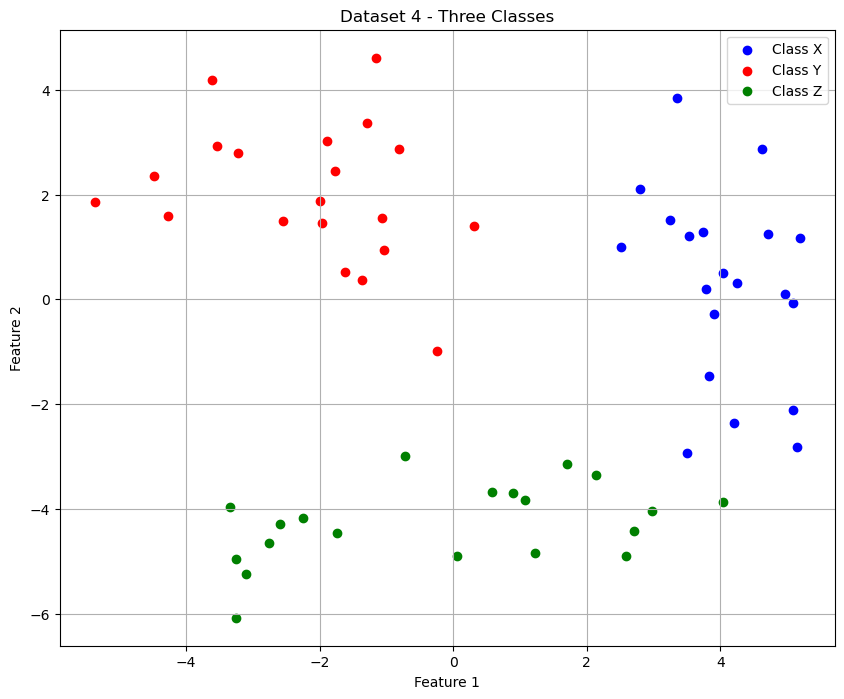

Training linear One-vs-Rest SVM for Dataset 4...
Linear One-vs-Rest SVM - Accuracy: 0.9833
Confusion Matrix:
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


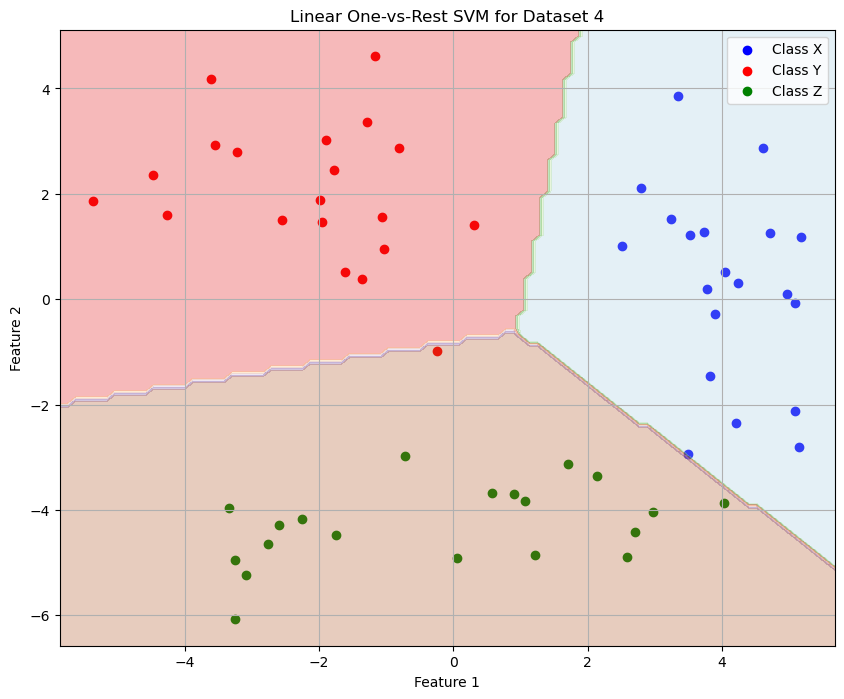


Training Polynomial (degree=2) One-vs-Rest SVM for Dataset 4...
Polynomial (degree=2) One-vs-Rest SVM - Accuracy: 0.9833
Confusion Matrix:
[[19  0  1]
 [ 0 20  0]
 [ 0  0 20]]


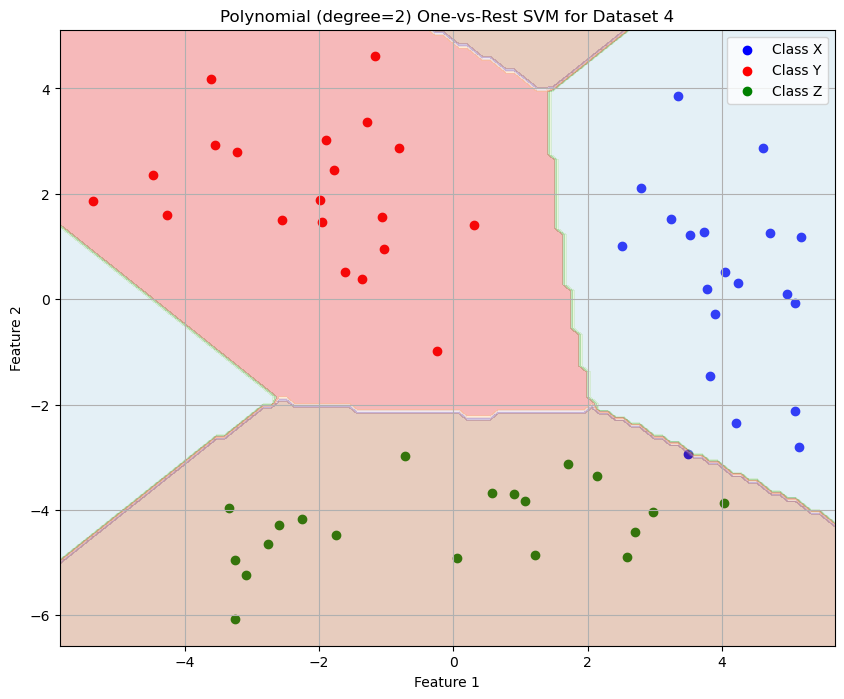


Training RBF (sigma=1.0) One-vs-Rest SVM for Dataset 4...
RBF (sigma=1.0) One-vs-Rest SVM - Accuracy: 1.0000
Confusion Matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


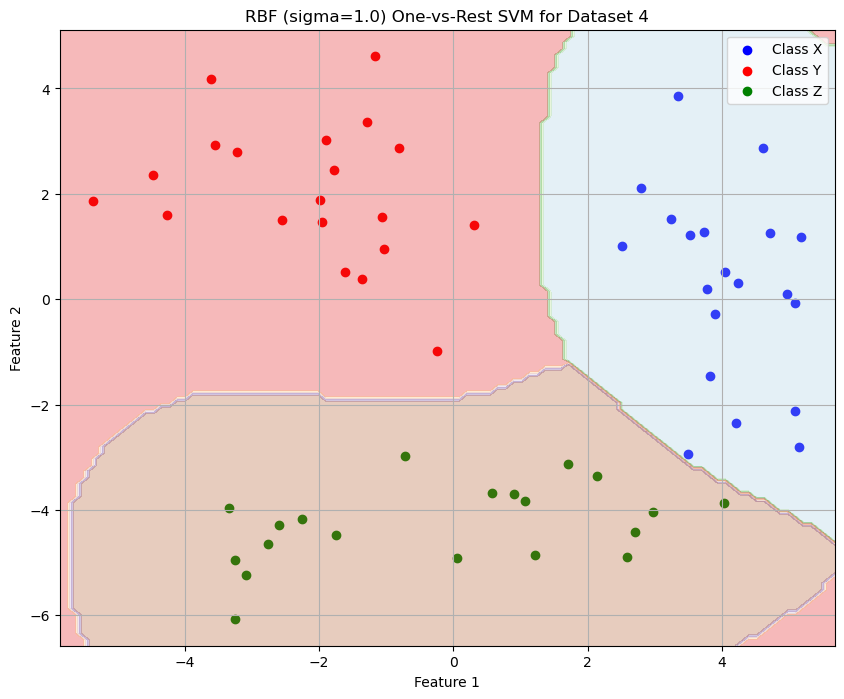


Best Kernel for Dataset 4: RBF (sigma=1.0)
Best Accuracy: 1.0000

Comparison with Linear One-vs-Rest SVM:
Linear One-vs-Rest SVM - Accuracy: 0.9833
Best Kernel One-vs-Rest SVM - Accuracy: 1.0000


In [29]:
 #8. Multi-class Classification for Dataset 4

# Dataset 4 consists of three sets of points corresponding to three classes
# We need to find classifiers for this multi-class case

# First, let's visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X_4[:, 0], X_4[:, 1], c='blue', label='Class X')
plt.scatter(Y_4[:, 0], Y_4[:, 1], c='red', label='Class Y')
plt.scatter(Z_4[:, 0], Z_4[:, 1], c='green', label='Class Z')
plt.title('Dataset 4 - Three Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# There are several approaches to multi-class classification:
# 1. One-vs-Rest (OVR): Train K binary classifiers, each separating one class from all others
# 2. One-vs-One (OVO): Train K(K-1)/2 binary classifiers, each separating one class from another
# 3. Direct multi-class formulation: Extend the binary SVM to handle multiple classes directly

# Let's implement the One-vs-Rest approach, which is the most common
def one_vs_rest_svm(X_list, gamma=0.1, kernel_func=None):
    """
    Implement a One-vs-Rest SVM classifier for multi-class classification
    
    Parameters:
    X_list: List of data points for each class [X_1, X_2, ..., X_K]
    gamma: Parameter controlling the trade-off between margin and misclassification
    kernel_func: Kernel function to use (if None, use linear SVM)
    
    Returns:
    classifiers: List of classifiers, each separating one class from the rest
    """
    K = len(X_list)  # Number of classes
    classifiers = []
    
    for i in range(K):
        # Separate class i (positive) from all other classes (negative)
        X_i = X_list[i]
        Y_i = np.vstack([X_list[j] for j in range(K) if j != i])
        
        if kernel_func is None:
            # Use linear SVM
            a, b = standard_svm(X_i, Y_i, gamma=gamma)
            classifiers.append((a, b))
        else:
            # Use kernel SVM
            alpha_x, alpha_y, b = kernel_svm(X_i, Y_i, kernel_func, gamma=gamma)
            classifiers.append((alpha_x, alpha_y, b, X_i, Y_i, kernel_func))
    
    return classifiers

# Function to make predictions with One-vs-Rest SVM
def predict_one_vs_rest(x, classifiers, kernel_func=None):
    """
    Make a prediction for a single point using One-vs-Rest SVM
    
    Parameters:
    x: The point to classify
    classifiers: List of classifiers from one_vs_rest_svm
    kernel_func: Kernel function used (if None, classifiers are linear)
    
    Returns:
    class_idx: Predicted class index
    """
    K = len(classifiers)
    scores = np.zeros(K)
    
    for i in range(K):
        if kernel_func is None:
            # Linear SVM
            a, b = classifiers[i]
            scores[i] = np.dot(x, a) - b
        else:
            # Kernel SVM
            alpha_x, alpha_y, b, X_i, Y_i, kernel_func = classifiers[i]
            
            # Compute the decision function
            f_x = 0
            # Contribution from X points
            for j in range(len(X_i)):
                f_x += alpha_x[j] * kernel_func(x, X_i[j])
            # Contribution from Y points
            for j in range(len(Y_i)):
                f_x -= alpha_y[j] * kernel_func(x, Y_i[j])
            # Add the bias term
            f_x += b
            scores[i] = f_x
    
    # Return the class with the highest score
    return np.argmax(scores)

# Function to evaluate One-vs-Rest SVM
def evaluate_one_vs_rest(X_list, classifiers, kernel_func=None):
    """
    Evaluate One-vs-Rest SVM on data
    
    Parameters:
    X_list: List of data points for each class [X_1, X_2, ..., X_K]
    classifiers: List of classifiers from one_vs_rest_svm
    kernel_func: Kernel function used (if None, classifiers are linear)
    
    Returns:
    accuracy: Overall accuracy
    confusion_matrix: Confusion matrix
    """
    K = len(X_list)
    total_samples = sum(len(X_i) for X_i in X_list)
    correct = 0
    confusion_matrix = np.zeros((K, K), dtype=int)
    
    for true_class in range(K):
        for x in X_list[true_class]:
            pred_class = predict_one_vs_rest(x, classifiers, kernel_func)
            confusion_matrix[true_class, pred_class] += 1
            if pred_class == true_class:
                correct += 1
    
    accuracy = correct / total_samples
    return accuracy, confusion_matrix

# Function to plot the decision boundaries for One-vs-Rest SVM
def plot_one_vs_rest(X_list, classifiers, kernel_func=None, title="One-vs-Rest SVM Classifier"):
    plt.figure(figsize=(10, 8))
    
    # Plot the data points
    colors = ['blue', 'red', 'green']
    labels = ['Class X', 'Class Y', 'Class Z']
    
    for i, X_i in enumerate(X_list):
        plt.scatter(X_i[:, 0], X_i[:, 1], c=colors[i], label=labels[i])
    
    # Plot the decision boundaries
    x_min, x_max = min(np.min(X_i[:, 0]) for X_i in X_list) - 0.5, max(np.max(X_i[:, 0]) for X_i in X_list) + 0.5
    y_min, y_max = min(np.min(X_i[:, 1]) for X_i in X_list) - 0.5, max(np.max(X_i[:, 1]) for X_i in X_list) + 0.5
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the class for each point in the grid
    Z = np.zeros(grid.shape[0])
    for i, x in enumerate(grid):
        Z[i] = predict_one_vs_rest(x, classifiers, kernel_func)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train and evaluate linear One-vs-Rest SVM
print("Training linear One-vs-Rest SVM for Dataset 4...")
linear_classifiers = one_vs_rest_svm([X_4, Y_4, Z_4], gamma=0.1)
linear_accuracy, linear_confusion = evaluate_one_vs_rest([X_4, Y_4, Z_4], linear_classifiers)

print(f"Linear One-vs-Rest SVM - Accuracy: {linear_accuracy:.4f}")
print("Confusion Matrix:")
print(linear_confusion)

# Plot the linear One-vs-Rest SVM
plot_one_vs_rest([X_4, Y_4, Z_4], linear_classifiers, title="Linear One-vs-Rest SVM for Dataset 4")

# Train and evaluate kernel One-vs-Rest SVM with different kernels
kernel_functions = {
    'Polynomial (degree=2)': lambda x, y: polynomial_kernel(x, y, degree=2),
    'RBF (sigma=1.0)': lambda x, y: rbf_kernel(x, y, sigma=1.0)
}

kernel_results_4 = {}

for kernel_name, kernel_func in kernel_functions.items():
    print(f"\nTraining {kernel_name} One-vs-Rest SVM for Dataset 4...")
    kernel_classifiers = one_vs_rest_svm([X_4, Y_4, Z_4], gamma=0.1, kernel_func=kernel_func)
    kernel_accuracy, kernel_confusion = evaluate_one_vs_rest([X_4, Y_4, Z_4], kernel_classifiers, kernel_func=kernel_func)
    
    kernel_results_4[kernel_name] = {
        'classifiers': kernel_classifiers,
        'accuracy': kernel_accuracy,
        'confusion_matrix': kernel_confusion
    }
    
    print(f"{kernel_name} One-vs-Rest SVM - Accuracy: {kernel_accuracy:.4f}")
    print("Confusion Matrix:")
    print(kernel_confusion)
    
    # Plot the kernel One-vs-Rest SVM
    plot_one_vs_rest([X_4, Y_4, Z_4], kernel_classifiers, kernel_func=kernel_func, 
                    title=f"{kernel_name} One-vs-Rest SVM for Dataset 4")

# Find the best kernel based on accuracy
best_kernel_4 = max(kernel_results_4.items(), key=lambda x: x[1]['accuracy'])
best_kernel_name_4 = best_kernel_4[0]
best_accuracy_4 = best_kernel_4[1]['accuracy']

print(f"\nBest Kernel for Dataset 4: {best_kernel_name_4}")
print(f"Best Accuracy: {best_accuracy_4:.4f}")

# Compare with linear SVM
print("\nComparison with Linear One-vs-Rest SVM:")
print(f"Linear One-vs-Rest SVM - Accuracy: {linear_accuracy:.4f}")
print(f"Best Kernel One-vs-Rest SVM - Accuracy: {best_accuracy_4:.4f}")



# Answers

*   Name: Jiaqiang Jing
*   Surname: Jing
*   CID: 06007965